## Machine Learning and Statistics, Winter 21/22

#### Overview of the scipy.stats Python library

* A clear and concise overview of the scipy.stats Python library.
* An example hypothesis test using ANOVA. You should find a data set on which it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats.

![image](https://www.fullstackpython.com/img/logos/scipy.png)

## Table of Contents:

1. [Introduction](#introduction)
    * [SciPy](#sp)
    * [SciPy Stats](#ss)
    * [ANOVA](#a)
    
 
2. [Setup](#setup)
    * [Dataset](#d)
    * [Assumptions](#a)
    
    
3. [Testing](#t)
    * [Logistic Regression](#lr)
    * [Support Vector Machines](#svm)
    * [K-Means Clustering](#kmc)
    
    
4. [References](#ref)

# Introduction <a name="introduction"></a>

## SciPy <a name="sp"></a>
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)



"SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data." [1](https://scipy.github.io/devdocs/tutorial/general.html)

SciPy stands for Scientific Python and was created by Travis Olliphant the creator of NumPy, and  it provides functions for optimization, statistics and signal processing. It is primarily written in Python with some elements in C, it is an open source library located in this github repository. [SciPy](https://github.com/scipy/scipy)

SciPy is organized into subpackages that specialise in different scientifc areas listed below:

* ```cluster``` - Clustering algorithms
* ```constants``` - Physical and mathematical constants
* ```fftpack``` - Fast Fourier Transform routines
* ```integrate``` - Integration and ordinary differential equation solvers
* ```interpolate``` - Interpolation and smoothing splines
* ```io``` - Input and Output
* ```linalg``` - Linear algebra
* ```ndimage``` - N-dimensional image processing
* ```odr``` - Orthogonal distance regression
* ```optimize``` - Optimization and root-finding routines
* ```signal``` - Signal processing
* ```sparse``` - Sparse matrices and associated routines
* ```spatial``` - Spatial data structures and algorithms
* ```special``` - Special functions
* ```stats``` - Statistical distributions and functions

This notebook will focus on the ```scipy.stats``` statistical functions package.

## SciPy Stats <a name="ss"></a>
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

The ```scipy.stats``` module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more. [2](https://docs.scipy.org/doc/scipy/reference/stats.html). They are categorized into these subheadings that are available within the package. 

* Continuous distributions
* Multivariate distributions
* Discrete distributions
* Summary statistics
* Frequency statistics
* Correlation functions
* Statistical tests
* Transformations
* Statistical distances
* Random variate generation
* Circular statistical functions
* Contingency table functions
* Plot-tests
* Masked statistics functions
* Univariate and multivariate kernel density estimation

Examples of some of the functions are described below:

### Libraries <a name="l"></a>

In [1]:
#Working with arrays
import numpy as np
#Dataframes
import pandas as pd

#2 libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Alternative Stats package
import statsmodels.stats.weightstats as stat

#Main stats package
import scipy.stats as ss

# Import the Tukey HSD test from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#plot styles
plt.style.use('seaborn')

#default plot size
plt.rcParams['figure.figsize'] = [8, 8]

---
### SciPy example functionality

Here we will show a very limited cross section of some of the functionality of the package.

### Continuous distributions
#### Norm
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

A normal continuous random variable. This can be used to produce a probability density function in the standardized form, or normal distribution. Produced using the code ```norm.pdf(x, loc, scale)```, the location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.

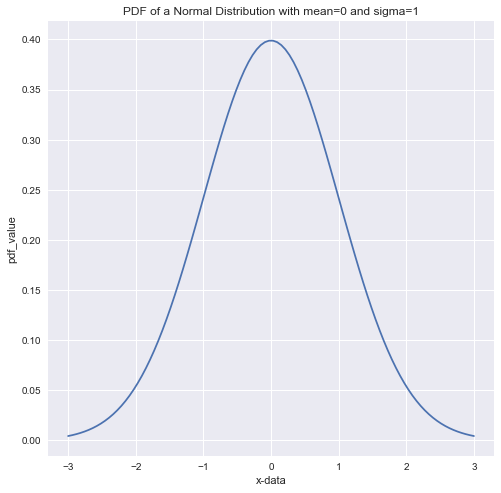

In [3]:
#100 datapoints between -3 and 3
x = np.linspace(-3,3,100)
#Norm function
pdf_result = ss.norm.pdf(x,loc=0,scale=1)

#Plot
plt.plot(x,pdf_result)
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.title("PDF of a Normal Distribution with mean=0 and sigma=1")
plt.show()

Adjusting the mean and standard deviation can easily manipulate the distribution using the ```norm``` function.

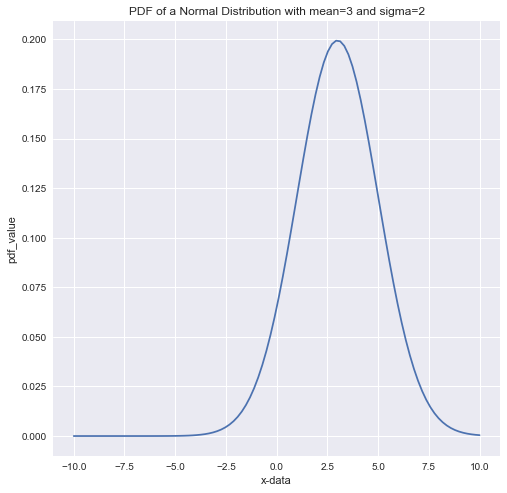

In [4]:
#100 datapoints between -10 and 10
x = np.linspace(-10,10,100)

#Norm function mean=3, sd=2
pdf_result = ss.norm.pdf(x,loc=3,scale=2)

plt.plot(x,pdf_result)
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.title("PDF of a Normal Distribution with mean=3 and sigma=2")
plt.show()

---
### Multivariate distributions

Multivariate distributions show comparisons between two or more measurements and the relationships among them. Below is an example of ```multivariate_normal``` within SciPy Stats.

#### multivariate_normal
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal)

Python Scipy scipy.stats.multivariate_normal object is used to analyze the multivariate normal distribution and calculate different parameters related to the distribution using the different methods available.

The mean keyword specifies the mean. The cov keyword specifies the covariance matrix.

In the example below, the scipy.ss.multivariate_normal.pdf method takes the input x, ```mean``` and covariance matrix ```cov``` and outputs a vector with a length equal to the number of rows in x where each value in the output vector represents pdf value for each row in x.

In [5]:
mean = np.array([0.4,0.8])
cov = np.array([[0.1, 0.3], [0.3, 1.0]])
x = np.random.uniform(size=(5, 2))
y = ss.multivariate_normal.pdf(x, mean=mean, cov=cov)

for i in range(len(x)):
    print(x[i],end=" ")
    print("------->",end=" ")
    print(y[i],end="\n")

[0.30010825 0.03189906] -------> 0.5054546967956888
[0.10294781 0.40937539] -------> 0.2925401814896832
[0.91807448 0.93503747] -------> 1.759770699266546e-05
[0.7729181  0.35743038] -------> 4.039887969318099e-06
[0.33141648 0.28473162] -------> 0.9628892397217864


---
### Summary Statistics

The libraries include:

* describe()- it returns descriptive stats of the arrays
* gmean()- it returns the geometric mean along a specific axis of an array
* hmean()- it returns the harmonic mean along a specific axis of an array
* sem()- it returns the standard error mean of the mean
* kurtosis()- it returns the kurtosis value of an array
* mode()- it returns the mode of an array
* skew()- it is to perform the skew test on an array
* zscore()- it returns the z-score relative to the mean and standard deviation values.

#### Describe
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.describe.html#scipy.stats.describe)

Used to compute several descriptive statistics of the passed array. In the example below an array of 100 numbers are generated and the describe details the min-max, mean, variance, skewness and kurtosis. As detailed in the documentation.

In [6]:
x = np.random.normal(size=100)
res = ss.describe(x)

res

DescribeResult(nobs=100, minmax=(-2.667076388278589, 2.308020344991281), mean=-0.1320522791344291, variance=1.0802833603936925, skewness=0.172194852667739, kurtosis=-0.1658683206665188)

##### Skew
Another example of available summary statistics is ```skew```. For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution.

In [7]:
ss.skew([1, 2, 3, 4, 5])

0.0

In [8]:
ss.skew([2, 8, 0, 4, 1, 9, 9, 0])

0.2650554122698573

Having very briefly shown examples of some of the distributions and statistical functionality within SciPy stats, we  will now focus on functionality for Correlation functions like analysis of variance ```ANOVA``` and other Statistical tests.

---
### ANOVA  <a name="a"></a>

Analysis of variance (ANOVA) is an analysis tool used in statistics that splits an observed aggregate variability found inside a data set into two parts: systematic factors and random factors. Analysts use the ANOVA test to determine the influence that independent variables have on the dependent variable in a regression study.[7](https://www.investopedia.com/terms/a/anova.asp)

ANOVA is used to compare differences of means among more than two groups. It does this by looking at variation in the data and where that variation is found. Like other classical statistical tests, we use ANOVA to calculate a test statistic (the F-ratio) with which we can obtain the probability (the P-value) of obtaining the data assuming the null hypothesis. A significant P-value (usually taken as P<0.05) suggests that at least one group mean is significantly different from the others. [8](https://learning.edanz.com/anova-explained/)

### Data

The dataset chosen here is the diet dataset from University of Sheffield Mathematics and Statistics webpage. It is listed as a suitable dataset to perform one and two way ANOVA.

https://www.sheffield.ac.uk/mash/statistics/datasets chosen from here as an example of ANOVA test

In [9]:
#Import the csv
filename = ("./Diet_R.csv")
df = pd.read_csv(filename)

In [10]:
df.shape

(78, 7)

Check the dataframe information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


Looking at the first entries we can see some missing data

In [12]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


Check for missing Gender fields, although we are not testing for gender these two entries both have the same entry for pre weight and weight6weeks. With the missing gender field we can assume this data is incomplete so it will be dropped from the analysis.

In [13]:
df[df.gender == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0


Drop index 0 and 1 the participants identified as incomplete data.

In [14]:
df = df.drop([0, 1])

In [15]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


Check for more null values.

In [16]:
display(df.isnull().sum())

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

Describe function on all variables.

In [17]:
df.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,39.868421,39.223684,170.776316,72.289474,2.039474,68.343421
std,22.843434,9.908379,11.419981,7.974653,0.823663,8.058938
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,19.750000,32.500000,163.750000,66.000000,1.000000,61.950000
50%,40.500000,39.000000,169.000000,72.000000,2.000000,68.950000
75%,59.250000,47.250000,175.250000,78.000000,3.000000,73.675000
max,78.000000,60.000000,201.000000,88.000000,3.000000,84.500000


Check to see if the groups are evenly distributed to be able to perfom a t-test if required. Depending on the assumptions discussed later if we are unable to perform and ANOVA we should choose a Welch's t-test for unequal variance data.

In [18]:
df.groupby("Diet").Person.count()

Diet
1    24
2    25
3    27
Name: Person, dtype: int64

In [19]:
correlation = df.corr()
correlation

,Person,Age,Height,pre.weight,Diet,weight6weeks
Person,1.000000,-0.106904,-0.031496,0.347509,0.946319,0.247000
Age,-0.106904,1.000000,0.083403,0.033931,-0.128529,0.055764
Height,-0.031496,0.083403,1.000000,0.157229,-0.118119,0.190821
pre.weight,0.347509,0.033931,0.157229,1.000000,0.044925,0.951204
Diet,0.946319,-0.128529,-0.118119,0.044925,1.000000,-0.051885
weight6weeks,0.247000,0.055764,0.190821,0.951204,-0.051885,1.000000


<AxesSubplot:>

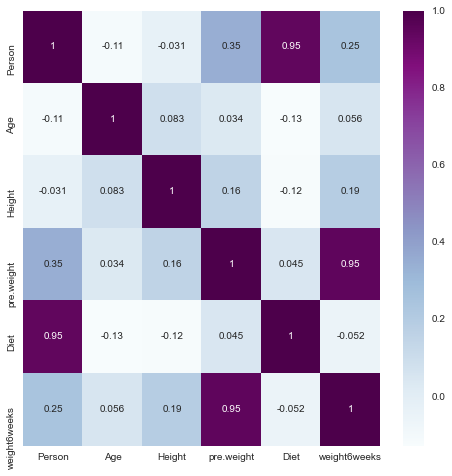

In [20]:
#Seaborn Plot of correlation
sns.heatmap(df.corr(),cmap="BuPu", annot=True)

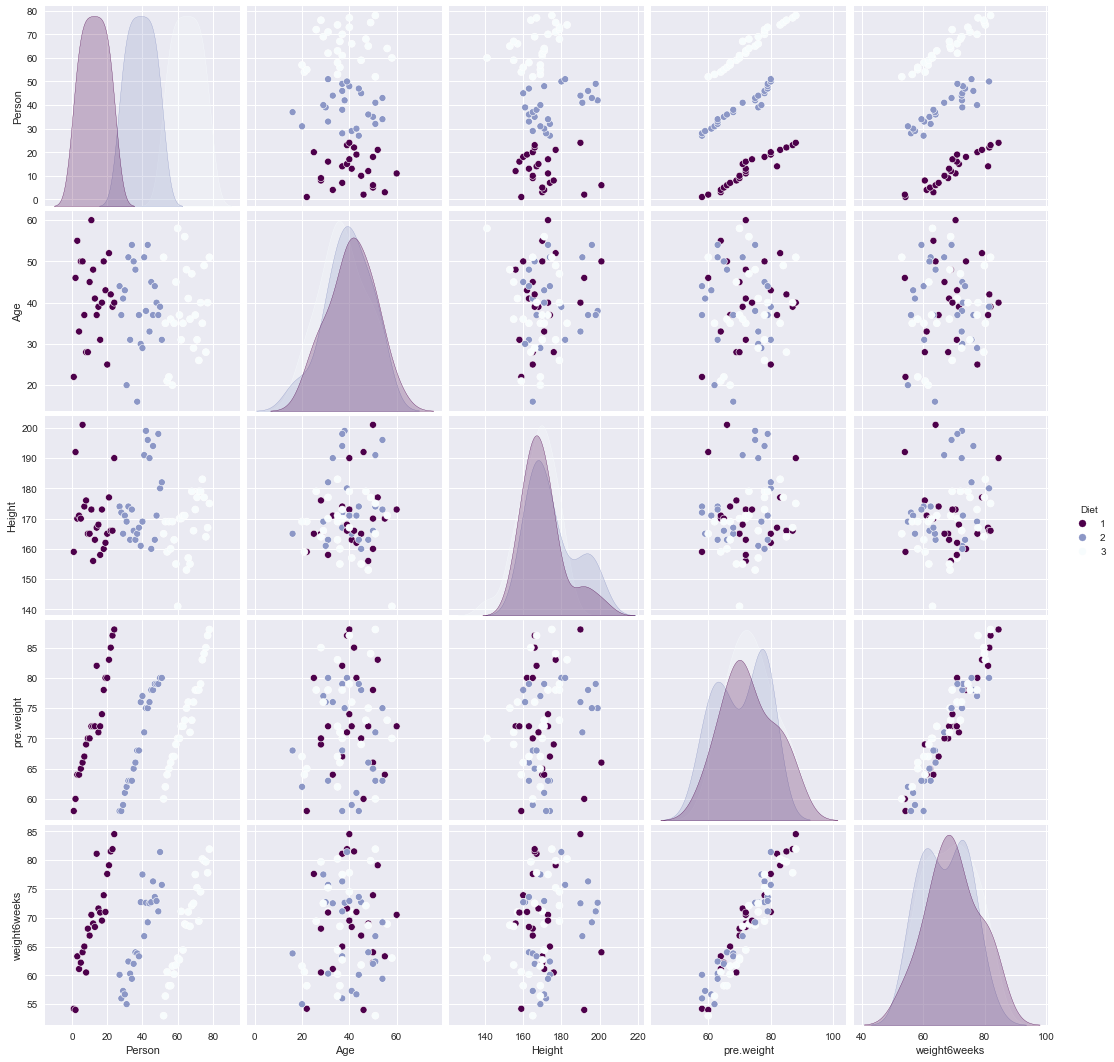

In [21]:
#Overview scatter plot of all Variables 
sns.pairplot(df, hue="Diet", palette="BuPu_r", height=3)

### Assumptions

Before analysing data using a one-way ANOVA, the data nneds to be checked to confirm that the dataset is suitable for a one-way ANOVA analysis. The data should pass six assumptions for a one-way ANOVA to produce a valid result.

### Assumption 1

Your dependent variable should be measured at the interval or ratio level, in this case the dependent variable is weight change which matches the requirement for variable type. 

In [22]:
#Calculate the weight loss by subtracting the new weight from the original weight
df['weightChange'] = df['pre.weight'] - df['weight6weeks']

In [23]:
#Set the dependent variable
dependent = df['weightChange']
dependent

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weightChange, Length: 76, dtype: float64

### Assumption 2

Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups. In this case there are three diet types and so 3 categorical independent groups.

In [24]:
#Set the data as a string so it is not treated as a value while plotting
df['Diet'] = df['Diet'].apply(str)

In [25]:
#Set the independent variable
independent = df['Diet']
independent

2     1
3     1
4     1
5     1
6     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 76, dtype: object

### Assumption 3

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. All the data can be assumed to have been collected reliably and in a scientific manner. There are no repeat participants and each participant is only adhering to one diet.

Although it should not be an issue, it is worth mentioning here that weight loss measured using just weight can have other factors other than the diet affecting weight loss. Often with weight loss it is easier to lose more weight the more you have to lose. So heavier starting weight may affect the overall weight loss. As a result of this we can calculate the change in Body Mass Index rather than weight to allow for stronger control of outside influence.

<AxesSubplot:xlabel='pre.weight', ylabel='Count'>

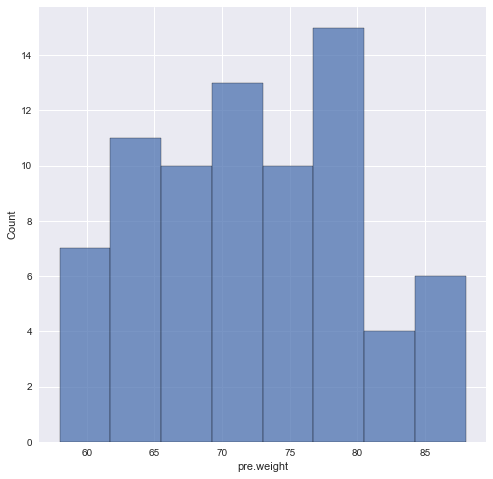

In [26]:
#Plot start weight
sns.histplot(x = df ["pre.weight"])

This is not a defined normal distribution shape so it is worth controlling this variable as mentioned

<AxesSubplot:xlabel='Height', ylabel='Count'>

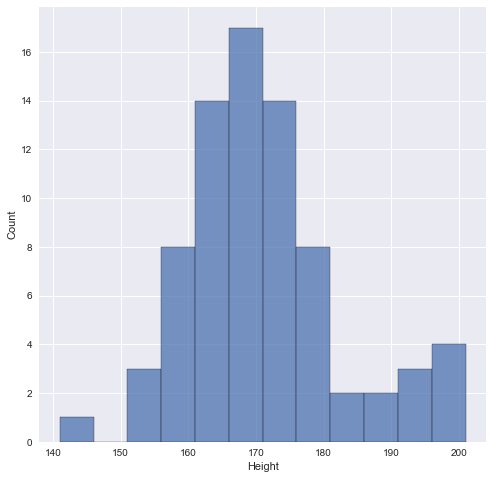

In [27]:
#Plot height
sns.histplot(x = df ["Height"])

This is a normal distribution howver there are a few outliers of very tall participants, calculating and testing the BMI will help control this potential influence. 

BMI = weight (kilograms) / height^2 (metres)

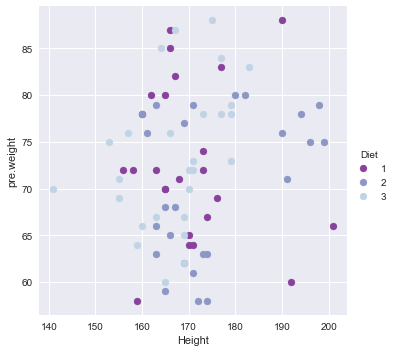

In [28]:
sns.FacetGrid(df,hue="Diet", palette="BuPu_r", height=5).map(plt.scatter, "Height", "pre.weight" ).add_legend()

There looks to be an even distribution of pre weight but taller participants for diet 1 and 2.

In [29]:
#Calculate BMI
df ['BMIStart'] = df ["pre.weight"] / (df ["Height"] / 100)**2
df ["BMIEnd"] = df ["weight6weeks"] / (df ["Height"] / 100)**2
df ["BMIChange"] = df ['BMIStart'] - df ["BMIEnd"]
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightChange,BMIStart,BMIEnd,BMIChange
2,1,0,22,159,58,1,54.2,3.8,22.942130,21.439025,1.503105
3,2,0,46,192,60,1,54.0,6.0,16.276042,14.648438,1.627604
4,3,0,55,170,64,1,63.3,0.7,22.145329,21.903114,0.242215
5,4,0,33,171,64,1,61.1,2.9,21.887076,20.895318,0.991758
6,5,0,50,170,65,1,62.2,2.8,22.491349,21.522491,0.968858
...,...,...,...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8,24.784258,23.948162,0.836095
74,75,1,49,177,84,3,79.9,4.1,26.812219,25.503527,1.308692
75,76,1,28,164,85,3,79.7,5.3,31.603212,29.632659,1.970553
76,77,1,40,167,87,3,77.8,9.2,31.195095,27.896303,3.298792


In [30]:
#Change the dependent variable
dependent = df['BMIChange']
dependent

2     1.503105
3     1.627604
4     0.242215
5     0.991758
6     0.968858
        ...   
73    0.836095
74    1.308692
75    1.970553
76    3.298792
77    1.991837
Name: BMIChange, Length: 76, dtype: float64

### Assumption 4

There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual pattern. As mentioned above height outliers have been addressed, and looking at the overall box plot below there are no outliers identified.

<AxesSubplot:xlabel='BMIChange'>

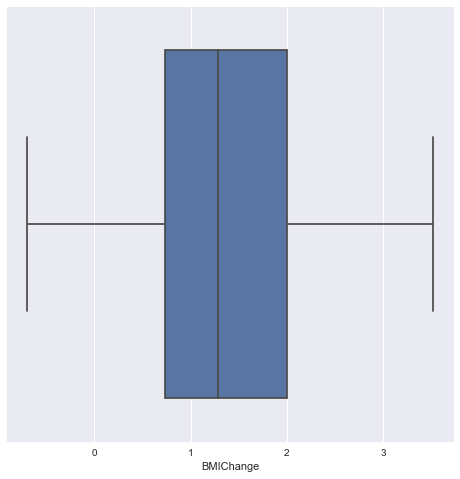

In [31]:
sns.boxplot(x=dependent)

<AxesSubplot:xlabel='BMIChange', ylabel='Diet'>

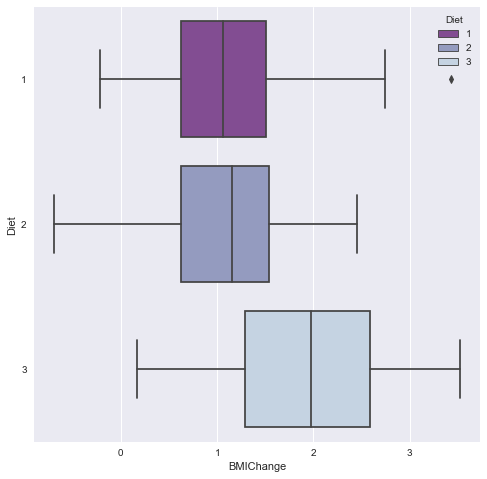

In [32]:
sns.boxplot(x=dependent, y=independent, hue="Diet", data=df, palette="BuPu_r", dodge=False) 

### Assumption 5

Your dependent variable should be approximately normally distributed for each category of the independent variable. The KDE plot below shows a fairly clear normal distribution for each diet type, there are a couple of kinks however it looks acceptable. To make sure this can be tested using the Shapiro Wilks test to test for normality.

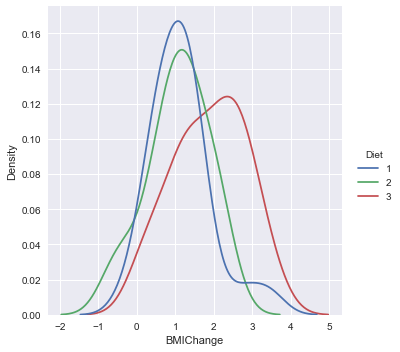

In [33]:
#KDE plot of BMI change per diet
sns.displot(x=dependent, hue=independent, kind="kde")

In [34]:
Diet1 = dependent[independent == '1']

In [35]:
ss.shapiro(Diet1)

ShapiroResult(statistic=0.9227969646453857, pvalue=0.06736458837985992)

In [36]:
Diet2 = dependent[independent == '2']

In [37]:
ss.shapiro(Diet2)

ShapiroResult(statistic=0.9701381921768188, pvalue=0.6485767960548401)

In [38]:
Diet3 = dependent[independent == '3']

In [39]:
ss.shapiro(Diet3)

ShapiroResult(statistic=0.9632238149642944, pvalue=0.43632328510284424)

In each of these cases the p value is greater than 0.05 and it can be accpted that there are sufficiently normally distributed for the requirements of a one-way ANOVA.

### Assumption 6

There needs to be homogeneity of variances, this is an assumption of the independent samples t-test and ANOVA stating that all comparison groups have the same variance. This can be tested using Levene's test for homogeneity of variances. A p value of less than 0.05 will not satisfy the requirements for the ANOVA, in this case the results are acceptable.

In [40]:
ss.levene(Diet1,Diet2,Diet3)

LeveneResult(statistic=1.059277396936748, pvalue=0.35197411075968044)

#### One-way ANOVA

In [41]:
ss.f_oneway(Diet1,Diet2,Diet3)

F_onewayResult(statistic=7.343810100433036, pvalue=0.0012417582082702786)

The p value of the one-way ANOVA is well below the significance level and so it can be confirmed that there is a significant difference between the 3 dependent categories. It is unknown however which category/categories this applies to, so some Post Hoc analysis is needed. 

### Post Hoc

Tukey's Test is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other. Scipy has a built in function to complete this formula. [10](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.tukey.html)

In [42]:
#Process the Tukey test
print(pairwise_tukeyhsd(dependent, independent))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2  -0.0693    0.9 -0.651 0.5123  False
     1      3   0.7439 0.0073 0.1729 1.3148   True
     2      3   0.8132 0.0027 0.2483 1.3781   True
--------------------------------------------------


From the result of this test we can see that the adjusted p value between group 1 and 2 is significantly higher than 0.05 and so confirms that there is not a significant difference between their means. There is however an acceptance between groups 1 and 3 and 2 and 3, so we can summise that category 3 is significantly different than the other to groups means. This is confirmed in the reject column of Tukey Test table.

---

A further calculation of the original proposed dependent variable "weightChange" can be carried out for interest only as it is bad practice to calculate multiple tests on the same data as it increases the odds of a false positve, In this calculations we can see the same results were found however the significant difference is much less pronounced when looking at the adjusted p values of the Tukey Test. If the test required a 99% confidence level was required with this test it would have been rejected in all cases.

In [43]:
#Change the dependent variable
dependent = df['weightChange']
independent = df['Diet']

Diet1 = dependent[independent == '1']
Diet2 = dependent[independent == '2']
Diet3 = dependent[independent == '3']

print("One-Way ANOVA for diet type and weight change")
print("-----------------------")
print("Diet 1:",ss.shapiro(Diet1))
print("Diet 2:",ss.shapiro(Diet2))
print("Diet 3:",ss.shapiro(Diet3))
print("-----------------------")
print(ss.levene(Diet1,Diet2,Diet3))
print("-----------------------")
print(ss.f_oneway(Diet1,Diet2,Diet3))
print("\n")
print(pairwise_tukeyhsd(dependent, independent))

One-Way ANOVA for diet type and weight change
-----------------------
Diet 1: ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)
Diet 2: ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)
Diet 3: ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)
-----------------------
LeveneResult(statistic=0.46290764582507116, pvalue=0.6312856401117967)
-----------------------
F_onewayResult(statistic=5.383104474859926, pvalue=0.006595853108669741)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.032    0.9 -1.6531 1.5891  False
     1      3   1.8481 0.0188  0.2567 3.4396   True
     2      3   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


### References

1. https://scipy.github.io/devdocs/tutorial/general.html
2. https://github.com/scipy/scipy
3. https://docs.scipy.org/doc/scipy/reference/stats.html
4. https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html#scipy.stats.norm
5. https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal
6. https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.describe.html#scipy.stats.describe
7. https://www.investopedia.com/terms/a/anova.asp
8. https://learning.edanz.com/anova-explained/
9. https://www.sheffield.ac.uk/mash/statistics/datasets
10. https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.tukey.html
